### 4 - Introduction

In this chapter, the author introduces a few data manipulations.  These skills are necessary for any person entering in data science/machine learning.  Using PyTorch, and not MXnet, I had developed the same code/results showed in the book.  

Linear algebra is the base of machine learning.  It gives us a robust set of techniques for working with tabular data.  Matrix operation is the core of machine learning,  principally using algorithms like backpropagation to optimization ours models parameters to fit our data as best possible, determining which way to optimize parameters of the models requires a little bit of calculus.  


### 4.1 Data Manipulation

Generally, data manipulation has two core tasks:
- Acquire data
- Process data
Using the tensors of Pytorch, this kind of tool is necessary to store our data.  The tensors provide a few key advantages. First, it provides asynchronous computations using GPU and CPU.  Secondly, tensors can provide support for automatic differentiation. It is necessary for backpropagation and deep learning.

#### 4.1.1 Getting Started

This chapter is focusing on getting you up and running with the basic functionality.  The next two chapters will be more concentrate on the math behind element-wise, normal distributions, and other essential operations.  In section 17.2, we have more in-depth mathematical content to be explored. <br><br>
First, we need to import the Torch module.  In Torch we have tensors. Tensors are numerical arrays. It is like NDArrays of MXNet and can be stored in CPU or GPU. Tensors with two axes correspond to matrices, and arrays with more than two axes don't have any unique names. 

In [2]:
import torch
import numpy as np
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

The variable x contains a tensor one-dimensional with length 12.  Another way to get the shape of a tensor is by using propriety .shape! If we have a two-dimensional array, the shape will be a tensor with two numbers! 

In [6]:
x.shape

torch.Size([12])

The function reshape allow us to change the shape of the tensors.  You can transform the one-dimensional tensor y into a matrix with shape (3,4).  If you don't want to make all calculations of dimensions, you can omit one dimension using the number -1 and writer the other dimensions. 

In [7]:
print(x.reshape((3,4)))
print(x.reshape((-1,4)))
print(x.reshape((3,-1)))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


***Pytorch*** allows us to initialize tensors in multiple ways.  For example, you can initialize tensors with one's, zero's, or grab catch from memory.  The last method is more performative, but not too useful, because of the big numbers. Take a look of numbers [4.5710e-41, -2.4891e-37,  3.0899e-41]

In [8]:
print(torch.ones(5))
print(torch.zeros(5))
print(torch.empty(5))

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])
tensor([0.0000e+00, 0.0000e+00, 7.0065e-45, 0.0000e+00, 8.9683e-44])


We can randomly sample numbers from known distributions like gaussian or exponential. 

In [9]:
normal = torch.distributions.normal.Normal(torch.tensor([0.0]),torch.tensor([1.0]))
exponential = torch.distributions.exponential.Exponential(torch.tensor([1.0]))
sample_n = [normal.sample() for _ in range(5)]
sample_e = [exponential.sample() for _ in range(5)]
print(sample_n)
print(sample_e)

[tensor([1.4635]), tensor([-0.7932]), tensor([-0.9193]), tensor([1.2948]), tensor([0.3475])]
[tensor([0.0188]), tensor([0.8526]), tensor([0.6789]), tensor([1.2094]), tensor([0.0985])]


In the code snippet above, we created five samples of normal distributions with mean = 0 and std = 1($\mathcal{N}(0,1)$) and five samples with exponential with rate = 1($\lambda = 1$). 

#### 4.1.2 Operations

In [10]:
x = torch.arange(4)
y = torch.ones_like(x) * 2
print("x = ",x)
print("y = ",y)
print("x + y = ", x + y)
print("x - y = ", x - y)
print("x * y = ", x * y)
print("x / y = ", x / y)

x =  tensor([0, 1, 2, 3])
y =  tensor([2, 2, 2, 2])
x + y =  tensor([2, 3, 4, 5])
x - y =  tensor([-2, -1,  0,  1])
x * y =  tensor([0, 2, 4, 6])
x / y =  tensor([0, 0, 1, 1])


Operations in Pytorch are element-wise. But, if you pay attention to div operation, it doesn't look right correct? It is because x and y are Long type tensors.  You have to transform these tensors in Float type:

In [11]:
x = torch.arange(4)
y = torch.ones_like(x) * 2

# Transformation
x = x.double()
y = y.double()

print("x = ",x)
print("y = ",y)
print("x + y = ", x + y)
print("x - y = ", x - y)
print("x * y = ", x * y)
print("x / y = ", x / y)

x =  tensor([0., 1., 2., 3.], dtype=torch.float64)
y =  tensor([2., 2., 2., 2.], dtype=torch.float64)
x + y =  tensor([2., 3., 4., 5.], dtype=torch.float64)
x - y =  tensor([-2., -1.,  0.,  1.], dtype=torch.float64)
x * y =  tensor([0., 2., 4., 6.], dtype=torch.float64)
x / y =  tensor([0.0000, 0.5000, 1.0000, 1.5000], dtype=torch.float64)


Many operations can be applied element-wise, such as exponentiation:

In [12]:
x = torch.arange(4)
x = x.double()
print(x.exp())
print(torch.exp(x))

tensor([ 1.0000,  2.7183,  7.3891, 20.0855], dtype=torch.float64)
tensor([ 1.0000,  2.7183,  7.3891, 20.0855], dtype=torch.float64)


***torch.mm*** allow us to made matrix operations. In the next code snippet, we create two matrices and transpose the second to make a dot multiplication between x and y. x has the shape (3,4), and y transpose has the shape(4,3), then creating a matrix with shape (3,3): 

In [13]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(x)
print(y.t())
print(torch.mm(x,y.t()))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[2, 1, 4],
        [1, 2, 3],
        [4, 3, 2],
        [3, 4, 1]])
tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])


Another operations: 

In [14]:
print(torch.cat((x,y),0)) # Concatenation along axes 0
print(torch.cat((x,y),1)) # Concatenation along axes 0
print(x == y) # Binary statement: if x(i,j) == y(i,j) than 1, else 0
print(x.sum())
print(x.double().norm().item()) # Only for floating-point types

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])
tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])
tensor([[0, 1, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)
tensor(66)
22.494443758403985


The function .item() transform the tensor into python scalar. 

#### 4.1.3 Broadcast Mechanism

In [15]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a,a.shape)
print(b,b.shape)

tensor([[0],
        [1],
        [2]]) torch.Size([3, 1])
tensor([[0, 1]]) torch.Size([1, 2])


In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

The broadcast mechanism is similar to Numpy. First, replicate the elements in rows and columns, so the two tensors have the same shape, and then apply the operations by elements.  Above Pytorch replicate column of tensor a and row b. 

#### 4.1.4 Indexing and slicing

Similar to Python array, elements in tensor can be accessed by its index.  One example, x[0:3] select the first element to last - 1 element, in that case, items [0,1,2] will be chosen. 

In [17]:
x = torch.arange(12)
x[0:3]

tensor([0, 1, 2])

In [18]:
x.reshape(-1,4)[1:3] # Matrix: Selects second and third row.

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [19]:
x.reshape(-1,4)[1:3,0:2] # Matrix: Selects second and third row and first and second column

tensor([[4, 5],
        [8, 9]])

In [20]:
x_diff = x.reshape(-1,4)
x_diff[1,2] = -1
print(x_diff)
x_diff[1,:] = -2
print(x_diff) #Assign multiple times in the second row and all columns

tensor([[ 0,  1,  2,  3],
        [ 4,  5, -1,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [-2, -2, -2, -2],
        [ 8,  9, 10, 11]])


We can also write elements of a matrix. Like above! 

#### 4.1.5 Saving memory

Saving memory is useful when we have restricted memory.  The last operations made in this notebooks, we always allocate new memory to host results.  In the example below,  y = x + y, the matrix pointed to y will be different after you get the result. Python id() function gives us the exact address of the referenced object in memory.  First, evaluates y + x, allocate new memory for the result and then subsequently redirects y to point at this new location in memory. 

In [21]:
before = id(y)
y = y.reshape(12) + x
id(y) == before

False

Using inplace operations, we can have the same space of memory to store our results and avoid memory leak and unnecessarily allocation of memory.  Using zeros_likes, we clone the shape of a matrix and allocate zeros values into this. 

In [22]:
z = torch.zeros_like(y)
print('id(z):', id(z))
z[:] = x + y
print('id(z):', id(z))

id(z): 140120981356120
id(z): 140120981356120


To make even better use of memory, because of x + y here still allocate a temporary buffer to store x + y, we can directly invoke torch operations, avoiding temporary buffers. 

In [23]:
before = id(z)
torch.add(x, y, out=z)
id(z) == before

True

Another way to make in-place operations are:

In [32]:
x = torch.arange(4)
y = torch.arange(4)
print("id(x):", id(x))
x += y
print(x,"id(x):",id(x))
x = torch.arange(4)
y = torch.arange(4)
print("id(x):",id(x))
x.add_(y)
print(x,"id(x):",id(x))

id(x): 140120981561848
tensor([0, 2, 4, 6]) id(x): 140120981561848
id(x): 140121834222216
tensor([0, 2, 4, 6]) id(x): 140121834222216


#### !!! Careful !!! 

In-place operations for autograd is ***dangerous!*** <br>
https://pytorch.org/docs/stable/notes/autograd.html#in-place-operations-with-autograd

#### 4.1.6 Mututal Transformation of NDArray and NumPy

This last subsection is only a minor and easy example of converting a numpy array to tensor and vice-versa. The converted arrays don't share the same memory, because you don't want the Torch or numpy waits for each other to make operation. 


In [38]:
x = torch.arange(5)
y = np.arange(5)
n_x = x.data.numpy()
t_x = torch.from_numpy(y)
print(type(n_x))
print(type(t_x))


<class 'numpy.ndarray'>
<class 'torch.Tensor'>


#### 4.1.7 Exercises

#### 1)

In [43]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(x)
print(y)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])


In [44]:
x == y

tensor([[0, 1, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [41]:
x < y

tensor([[1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [45]:
x > y

tensor([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

#### b)

In [51]:
a = torch.arange(6).reshape((2,3, 1))
b = torch.arange(2).reshape((1, 2))
print(a)
print(b)

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])
tensor([[0, 1]])


In [52]:
a + b

tensor([[[0, 1],
         [1, 2],
         [2, 3]],

        [[3, 4],
         [4, 5],
         [5, 6]]])

Another situation

In [81]:
x = torch.empty(5,5,2,1)
y = torch.empty(    3,1)

In [82]:
x + y

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

Broadcasting operations have to respect two rules:
- The correspondent dimensions of vectors are equal, or
- One of the correspondent dimensions are 1

In the case above, 2 $\neq$ 3, so the operation is impossible! 

#### c)

In [104]:
a = torch.arange(12).reshape((3,4))
b = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
c = torch.ones(9).reshape((3,3)).long()
print(a)
print(b.t())
print(c)
out_mm = torch.zeros_like(c)
print("id(out_mm):",id(out_mm))
torch.mm(a, b.t(), out = out_mm)
torch.add(out_mm, c,  out = out_mm)
print(out_mm)
print("id(out_mm):",id(out_mm))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[2, 1, 4],
        [1, 2, 3],
        [4, 3, 2],
        [3, 4, 1]])
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
id(out_mm): 140120977403120
tensor([[ 19,  21,  11],
        [ 59,  61,  51],
        [ 99, 101,  91]])
id(out_mm): 140120977403120


### 4.2 Linear Algebra

Following sections will have some basics linear algebra. Algebra is one of the cores of machine learning concepts. Mathematical notations, codes, and explanations will fill the next sections of this notebook

#### 4.2.1 Scalars

Scalars are numbers in ${\rm I\!R}$ space that can be represented in mathematical notation using ordinary lower-case letters (x, y, z).  In equation like this: x = 10 + y, 10 is a scalar and x e y are variables representing unknown scalars.  Another way to said that scalars are in ${\rm I\!R}$ is a math notation x $\in$ R, the symbol $\in$ represents "in" and denotes membership in a set. <br>
We can create scalars in Pytorch using torch.tensor. But, we have to pay attention to what type of scalar creates. The type of scalars makes a difference for training and evaluate models. Integers scalars are suitable for labels and classification, while float scalars are useful for regression.  

In [16]:
a = torch.tensor([0.2])
b = torch.tensor([1])
c = torch.tensor([0.8])
print(a.type())
print(b.type()) # Long int
print('a + c = ', a + c)
print('a * c = ', a * c)
print('a / c = ', a / c)
print('a ** c = ', torch.pow(a,c))
print(a + b) # Differs type can be manipulate together

torch.FloatTensor
torch.LongTensor
x + y =  tensor([1.])
x * y =  tensor([0.1600])
x / y =  tensor([0.2500])
x ** y =  tensor([0.2759])


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'exponent'

#### 4.2.2 Vectors

Vectors are a list of scalars. For example: [3.0, 0.4, 1.2]. Each scalar in a vector is known as entries or component.  Features in machine learning are represented using vectors. If the problem is predicting the value of a house, the features vector can be numbers of rooms, numbers of bathrooms, size, etc. Vectors are represented in math notation using lower-case bold letters, like this: (**x, v, b**).  In ***Pytorch*** vectors are tensors with multiple scalars, and these are in the same type. 

In [18]:
x = torch.arange(5)
print(x)
print(x[2])

tensor([0, 1, 2, 3, 4])
tensor(2)


**Tensors are zero-based numbering similar to lists and arrays.** 

#### 4.2.3 Dimensionality, length and shape

Vectors have length, in another way, numbers of components.  In math notation vectors with n elements are in R^n-dim spaces.  So, here, we have some confuse concepts.  In python, the function len(), return the size of a vector, but, this size, can be accessed using the attribute shape. Tensors vectors in Pytorch only have one dimension, so, the attribute shape will return a tuple with one number. Matrix returns a tuple with two numbers and goes on. Scalars have 0-dimension. 
<br>
*Note that the word dimension is overloaded and this tends to confuse people. Some use the dimensionality
of a vector to refer to its length (the number of components). However, some use the word dimensionality to
refer to the number of axes that an array has. In this sense, a scalar would have 0 dimensions, and a vector
would have one dimension.
To avoid confusion, when we say a 2D array or 3D array, we mean an array with 2 or 3 axes. Pag-45* **Dive into deep learning**

In [22]:
a = 2
x = torch.tensor([1,2,3])
y = torch.tensor([10,20,30])
print(x + a)
print(a * x + y)

tensor([3, 4, 5])
tensor([12, 24, 36])


In [25]:
len(x)

3

In [26]:
x.shape

torch.Size([3])

#### 4.2.4 Matrices

Matrices are 2D vectors and are represented by capital letters(*A, B, C*).  Matrices are a table, and each component are $a_{ij}$ belongs to i-th row and j-th column.  
$$ \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\ 
a_{21} & a_{22} & a_{23} \\ 
\end{pmatrix} $$
<br> 
In Pytorch, matrices will create by specifying the two components of a tuple(n,m). 

In [28]:
m = torch.ones((2,3))
m

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Or using reshape to modify a tensor vector!

In [31]:
m = torch.ones(6)
print(m)
m.reshape((2,3))

tensor([1., 1., 1., 1., 1., 1.])


tensor([[1., 1., 1.],
        [1., 1., 1.]])

Matrices are useful to store tabular with rows representing samples and columns representing features. In the example of house cited above, one row is a house with its features in columns. In Pytorch an entire row is accessed using one number(desire row) and colons. For example: 

In [33]:
m = torch.arange(6).reshape((2,3))
m

tensor([[0, 1, 2],
        [3, 4, 5]])

In [34]:
m[1,:]

tensor([3, 4, 5])

In [35]:
m[:,1] # Same for columns

tensor([1, 4])

Matrix can be transposed using t() function. 

In [36]:
m.t()

tensor([[0, 3],
        [1, 4],
        [2, 5]])

#### 4.2.5 Tensors

*Just as vectors generalize scalars, and matrices generalize vectors, we can actually build data structures
with even more axes. Tensors give us a generic way of discussing arrays with an arbitrary number of axes.
Vectors, for example, are first-order tensors, and matrices are second-order tensors. <br>
Using tensors will become more important when we start working with images, which arrive as 3D data
structures, with axes corresponding to the height, width, and the three (RGB) color channels. Pag-46* **Dive into deep learning**  

In [39]:
X = torch.arange(24).reshape((2, 3, 4))
print('X.shape =', X.shape)
print('X =', X)

X.shape = torch.Size([2, 3, 4])
X = tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


#### 4.2.6 Basic properties of tensor arithmetic

Element-wise operations don't change the shape of tensors. It same happens a scalar multiplies tensors. In math, these properties called AXPT operation. 

In [46]:
a = 2
x = torch.ones(3)
y = torch.ones(3)
print(x.shape)
print((a * x).shape)
print((x + y).shape)

torch.Size([3])
torch.Size([3])
torch.Size([3])


#### 4.2.7 Sums and means

There are some operations we can do with matrices and arrays. We can call *.sum()* to sum elements of an array or a matrix. We can calculate the mean of an array or a matrix using the function *.mean()*.  The symbol that represents sum is $\sum$.  To express the sum of the vector components u with dimension d; we can write $\sum_{i=1}^{d}a_{i}$. Mean is $\frac{1}{d}\sum_{i=1}^{d}a_{i}$. Sum of a marix $\sum_{i=1}^{d_1}\sum_{j=1}^{d_2}a_{ij}$. Mean of a matrix $\frac{1}{d_1 \times d_2}\sum_{i=1}^{d_1}\sum_{j=1}^{d_2}a_{ij}$

In [13]:
a = torch.Tensor([1,2,3])
b = torch.arange(12).reshape((3,4)).float() # Only calculate mean of float type
print(a.sum()) 
print(a.mean())
print(b.sum())
print(b.mean())

tensor(6.)
tensor(2.)
tensor(66.)
tensor(5.5000)


Others possible operations:
- std(Standard Deviation): *.std()*
- var(Variance): *.var()*
- unique(Unique values): *.unique()*

In [14]:
a = torch.Tensor([1,2,3,1,4,1,1,1,5,6])
a.unique()

tensor([1., 2., 3., 4., 5., 6.])

#### 4.2.8 Dot products

The dot product is an essential operation in machine learning.  Given two vectors <b>u</b> and <b>v</b>, which has the same length,  we multiplication elements with the correspondent index and sum the multiplications. So the returned result is a scalar.  
$$a \cdot b = \sum_{i}^{d}a_{i}b_{i} = a_{1}b_{1} + a_{2}b_{2} + \cdots + a_{n}b_{n}$$  

In [19]:
a = torch.arange(5).float()
b = torch.tensor([2]).repeat_interleave(5).float() # Repeat elements of a vector N times
print(a)
print(b)

tensor([0., 1., 2., 3., 4.])
tensor([2., 2., 2., 2., 2.])


In [22]:
result = torch.empty([])
torch.dot(a,b,out=result)
result

tensor(20.)

In [26]:
torch.sum(a * b) # Another way 

tensor(20.)

There are special cases when the dot product has context.  For example, when we have a vector with values that sum to 1 and are non-negative, and another vector, the dot product between these two vectors are a weighted average. 
$$ \sum_{i}^{d}w_{i} = 1 $$

#### 4.2.9 Matrix-vector products

A matrix is a set of vectors. The matrix below can be represented in terms of its row vectors:

$$A = \begin{pmatrix}
a_{11} & a_{12} & a_{13}  \\ 
a_{21} & a_{22} & a_{23}  \\ 
a_{31} & a_{32} & a_{33}
\end{pmatrix}
$$
Representa as: 
$$ A = \begin{pmatrix}
a_{1}^{T} \\
a_{2}^{T} \\
a_{3}^{T} 
\end{pmatrix}
$$
$$ x = \begin{pmatrix}
x_{1} \\
x_{2} \\
x_{3} 
\end{pmatrix}
$$


Each $a_{i}^{T} \in {\rm I\!R}^{m}$ is row representing the <i>i-th</i> row of matrix $A$. The result's vector of the multiplication between A and <b>x</b> is <b>y</b> $\in {\rm I\!R}^{n}$. 

$$ A\textbf{x} = \begin{pmatrix}
a_{1}^{T} \\
a_{2}^{T} \\
a_{3}^{T} 
\end{pmatrix} \begin{pmatrix}
x_{1} \\
x_{2} \\
x_{3} 
\end{pmatrix} = \begin{pmatrix}
a_{1}^{T}\textbf{x} \\
a_{2}^{T}\textbf{x} \\
a_{3}^{T}\textbf{x} 
\end{pmatrix} $$

So we can see the the multiplication by a matrix $A  \in {\rm I\!R}^{n\times m}$ as a tranformation that projects vectors from ${\rm I\!R}^{m}$ to ${\rm I\!R}^{n}$. 

In pytorch we use the function *.mv()*, this means matrix-vector product. 

*These transformations turn out to be remarkably useful. For example, we can represent rotations as multi-
plications by a square matrix. As we will see in subsequent chapters, we can also use matrix-vector products
to describe the calculations of each layer in a neural network. Pag-49* **Dive into deep learning**  

In [6]:
a = torch.arange(9).reshape((3,3)).float()
b = torch.tensor([2]).repeat_interleave(3).float()
result = torch.empty([])
print(a)
print(b)
result = torch.mv(a,b,out=result) # .mv
print(result)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([2., 2., 2.])
tensor([ 6., 24., 42.])


#### 4.2.10 Matrix-matrix multiplication

Matrix-matrix is similar to the section above. So if we have two matrices $A \in {\rm I\!R}^{n\times m}$ e $B \in {\rm I\!R}^{m\times k}$, the result is $C \in {\rm I\!R}^{n\times k}$ .  

In [6]:
a = torch.arange(12).reshape((4,3)).float()
b = torch.arange(6).reshape((3,2)).float()
result = torch.empty([])
torch.mm(a,b,out=result)
print(result.shape) # 4x3 and 3x2 transform to 4x2
print(result)

torch.Size([4, 2])
tensor([[10., 13.],
        [28., 40.],
        [46., 67.],
        [64., 94.]])


#### 4.2.11 Norms

Norms are essential concepts in machine learning. In machine learning, we are often trying to solve optimization problems:  Maximize the probability of observed data. Create representations of items likes words, sentences,  books, texts, products, in way that similar items have representations that minimize their distances.  These objectives are expressed using norms.  
Norms can calculate how "big" is a vector or matrix. The representation of a norm is: $\| \cdot \|$. So the norm of vector or matrix is: $\| \textbf{x}\| - \| A\| $ respectivily.
<br>
All norms has to satisfy these properties:
- $\| \alpha A\|= |\alpha|\| A\|$ (We multiply absolute value of scalar to norm)
- $\| A + B \| \leq \| A \| + \| B \|$ (Triangle inequality)
- $\| A \| \geq 0$ (All norms must be non-negative)
- If $ \forall i,j,a_{ij} = 0$, then $\| A \| = 0$ (The smallest norm is achieved by a matrix or vector consisting of all zeros)

It is possible to have zero norm with non-zero matrices, but is impossible to have norm non-zero to zero matrices.


*If you remember Euclidean distances (think Pythagoras’ theorem) from grade school, then non-negativity
and the triangle inequality might ring a bell. You might notice that norms sound a lot like measures of
distance. <br>
In fact, the Euclidean distance $\sqrt{x_{1}^{2} + \cdots + x_{n}^{2}} $ is a norm. Specifically it is the L2-norm. An analogous
computation, performed over the entries of a matrix, e.g. $\sqrt{\sum_{i,j}a_{i,j}^{2}}$ is called the Frobenius norm. More
often, in machine learning we work with the squared L2 norm (notated $L_{2}^{2}$). We also commonly work with
the L1 norm. The L1 norm is simply the sum of the absolute values. It has the convenient property of placing. Pag 50* **Dive into deep learning**   

#### 4.2.12 Basic Vector Properties

- Addtive axioms (x,y,z are vectors)
    - x + y = y + x
    - (x + y) + z = x + (y + z)
    - 0 + x = x + 0 =  x
    - (-x) + x = x + (-x) = 0
- Multiplicative axioms (x is a vector and a, b are scalars)
    - 0 $\cdot$ x = 0
    - 1 $\cdot$ x = x
    - (ab)x = a(bx)
- Distributive axioms (x and y are vectors and a, b are scalars)
    - a(x + y) = ax + ay
    - (a + b)x = ax + bx

#### 4.2.13 Special matrices

- <b>Symmetric Matrix</b>: • Symmetric Matrix These are matrices where the entries below and above the diagonal are the same.
In other words, we have that $M^{T} = M$. An example of such matrices are those that describe pairwise
distances, i.e. $M_{ij} =\|x_{i} −x_{j}\|$. Likewise, the Facebook friendship graph can be written as a symmetric matrix where $M_{ij} = 1$ if i and j are friends and $M_{ij} = 0$ if they are not. Note that the Twitter graph
is asymmetric - $M_{ij} = 1$, i.e. i following j does not imply that $M_{ji} = 1$, i.e. j following i.
- <b>Antisymmetric Matrix</b>: These matrices satisfy $M^{T} = −M$. Note that any square matrix can always be decomposed into a symmetric and into an antisymmetric matrix by using $M = \frac{1}{2}(M + M^{T}) + \frac{1}{2}(M - M^{T}).$ 
- <b>Diagonally Dominant Matrix</b>: These are matrices where the off-diagonal elements are small relative
to the main diagonal elements. In particular we have that $M_{ii} \geq \sum_{j \neq i}M_{ij}$ and $M_{ii} \geq \sum_{j \neq i} M_{ji}$. If a matrix has this property, we can often approximate M by its diagonal. This is often expressed as diag(M).
• <b>Positive Definite Matrix</b> These are matrices that have the nice property where $x^{⊤}Mx > 0$ whenever $x \neq 0$. Intuitively, they are a generalization of the squared norm of a vector $\|x \|^{2} = x^{⊤}x$. It is easy
to check that whenever $M = A^{⊤}A$, this holds since there $x^{⊤}Mx = x^{⊤}A^{⊤}Ax = \|Ax\|^{2}$. There is a
somewhat more profound theorem which states that all positive definite matrices can be written in form.

These concepts above are essential to understand better machine learning. These properties and special matrices are widely used in fundamental machine learning concepts. Only go further if you understand all the concepts above.  Pag 52 **Dive into deep learning**   

### 4.3 Automati Differentiation

Automatic differentiation is one of the best tools that 
PyTorch contains. It frees the users to calculate the gradient by ourself.  The package <i>autograd</i> provides automatic differentiation for all operations on <i>Tensors</i>. The graph of operations is defined-by-run, so the backpropagation is defined by how your code executes, and that every single operation can be different. 

Train a neural network is updating the weights, so they get better each iteration. Minimizing a <i>loss function</i> is the way we can know if the neural network will be successful. That <i>loss function</i> gives us the directions, whether the weights need <b>increases</b> or <b>decreases</b> according to actual values. So, in that case, the <i>loss function</i> needs to be differentiable concerning our parameters. 

#### 4.3.1 A simple example 

Using tensors if you set the attribute <i>requires_grad</i> to True, then all operations will be tracked.  And after these operations, using the <i>function backward()</i>,  you will have all the gradients computed automatically. 
 

In [52]:
x = torch.arange(4).float()
x.requires_grad_(True)
print(x)

tensor([0., 1., 2., 3.], requires_grad=True)


In [53]:
y = 2 * torch.dot(x, x)
y.backward()
print(y)

tensor(28., grad_fn=<MulBackward0>)


In [54]:
x.grad

tensor([ 0.,  4.,  8., 12.])

If you pay attention, there is attribute <i>grad_fn</i>; this attribute is an object of class <i>Function</i>. This class is responsible for tracking all operations made with <i>tensors</i>. In our case, the operation dot creates an op: grad_fn=MulBackward0, or in other words, multiplication of two vectors. 

In [55]:
x.grad - (4 * x)

tensor([0., 0., 0., 0.], grad_fn=<SubBackward0>)

The gradient of the function $y = x^{T}x$ with respect to <b>x</b> should be 4x. The above operation shows it to us. <br>
If you make another operation with <b>x</b>, the grad attribute will have other values because of overwritten. 
 

In [56]:
y = x.norm()
y.backward()
print(x.grad) # Different from the book, because of the grads sum itself. 

tensor([ 0.0000,  4.2673,  8.5345, 12.8018])


#### 4.3.2 Backward fo Non-scalar Variable

When the <b>y</b> is not a scalar anymore, autograd could not compute full Jacobian directly because it is too complex to calculate. In both machine learning and deep learning, we only compute the gradient of a <i>loss function</i>, whose values are often scalars. 

#### 4.3.3 Detach Computations

<i>Detach</i> is a function to stop tracking operations. We can use this to consume less memory from GPU or CPU, preventing future computation from being tracked.  
Another way is to put your code inside a <i>"with torch.no_grad()"</i>. This can be particularly helpful when evaluating model because the model may have trainable parameters with requires_grad=True, but for which we don't need the gradients.

In [69]:
x = torch.tensor([5.],requires_grad=True)
y = x * x 
u = y.detach()
z = u * x
z.backward()
x.grad - u

tensor([0.])

In code above, the following backward computes $ \frac{\partial u^{2}x}{\partial x}$ with $u = x$ instead of $ \frac{\partial x^{3}}{\partial x}$

Since the computation of <b>y</b> is still recorded, we can call <i>y.backward()</i> to get $\frac{\partial y}{\partial x} = 2x$

In [73]:
x = torch.tensor([5.],requires_grad=True)
y = x * x 
u = y.detach()
z = u * x
# z.backward() If you maintain this line the grad will be summed 
y.backward()
x.grad - 2*x


tensor([0.], grad_fn=<SubBackward0>)

In [81]:
# Other way
with torch.no_grad():
    x = torch.tensor([5.],requires_grad=True)
    print(x)
    y = x * x
    print(y) # Take a look, y don't have requires_grad=True

tensor([5.], requires_grad=True)
tensor([25.])


#### 4.3.4 Head gradients

We can use detach to break computations into several parts.  Assume  $u = f(x)$ and $z = g(x)$, by chain rule we have $\frac{\partial z}{\partial x} = \frac{\partial z}{\partial u}\frac{\partial u}{\partial x}$. To compute $\frac{\partial z}{\partial u}$, we can first detach u from the calculation and then call z.backward() to calculate the first term. 

In [95]:
x = torch.tensor([5.],requires_grad=True)
y = torch.ones(1) * 2
y.requires_grad_(True)
u = x * y
v = u.detach()
v.requires_grad_(True)
z = v + x
z.backward()
x.grad, y.grad

(tensor([1.]), None)

<i>We can call <i>u.backward()</i> to compute the second term, but pass the first term as the head gradients to multiply both terms so that <b>x.grad</b> will contains $\frac{\partial z}{\partial x}$ instead of $\frac{\partial u}{\partial x}.$ Pag-56 </i> <b>Dive nto Deep learning</b>

In [96]:
x = torch.tensor([5.],requires_grad=True)
y = torch.ones(1) * 2
y.requires_grad_(True)
u = x * y
v = u.detach()
v.requires_grad_(True)
z = v + x
z.backward()
x.grad, y.grad
u.backward(v.grad)
x.grad, y.grad

(tensor([3.]), tensor([5.]))

#### 4.3.5 Training mode and prediction mode

The training mode is implicit. We will see later when we train the models. But, for curiosity,  *model.train() - *Not necessary* -  put models into training mode and *model.eval()* put models into prediction mode. 

#### 4.3.6 Exercises

#### 1)

In [99]:
x = torch.arange(4).float()
x.requires_grad_(True)
y = 2 * torch.dot(x, x)
y.backward(retain_graph=True)
print(x.grad)
y.backward()
print(x.grad)


tensor([ 0.,  4.,  8., 12.])
tensor([ 0.,  8., 16., 24.])


In [100]:
#### If you not put retain graph, this happens
x = torch.arange(4).float()
x.requires_grad_(True)
y = 2 * torch.dot(x, x)
y.backward()
print(x.grad)
y.backward()
print(x.grad)


tensor([ 0.,  4.,  8., 12.])


RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

#### 2)

In [111]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c


a = torch.normal(torch.tensor([1.]))
a.requires_grad_(True)
d = f(a)
d.backward()
print(a.grad == (d / a))

tensor([1], dtype=torch.uint8)


In [ ]:
# With vector

In [119]:
n = torch.distributions.Normal(torch.tensor([4.0]), torch.tensor([0.5]))
a = n.sample((2,))
a.requires_grad_(True)
d = f(a)
print(d)
d.sum().backward() # Need to sum because d is vector and not a scalar. 
print(a.grad) 
print(a.grad == (d / a)) # Verifying the grad: Seems to work

tensor([[937.7441],
        [933.7056]], grad_fn=<MulBackward0>)
tensor([[256.],
        [256.]])
tensor([[1],
        [1]], dtype=torch.uint8)


#### 3)

In [3]:
import math
def f(a):
    b = a ** 2
    return b

def derive(function, value):
    h = 0.0000000000001
    top = function(value + h) - function(value)
    bottom = h
    slope = top / bottom
    # Returns the slope to the third decimal
    return slope

a = torch.tensor([3.])
a.requires_grad_(True)
d = f(a)
d.backward()
print(a.grad)
print(derive(f,a.item()))
print(a.grad.item() / derive(f,a.item())) # Too close to one *.*

tensor([6.])
5.986322548778844
1.002284783539428


#### 4) 

?????

#### 5)

Because in the second derivate, we need to calculate  Hessians matrices, which means, we need to calculate matrix inverse, requiring $O(n^{3})$ operations. 


#### 6) 

???? 

#### 7) 

Using the forward difference formula:

In [142]:
def derive(function, value):
    h = 0.0000000000001
    top = function(value + h) - function(value)
    bottom = h
    slope = top / bottom
    # Returns the slope to the third decimal
    return slope

In [22]:
def f(a):
    b = np.sin(a)
    return b

In [23]:
print(f(math.pi/6))
print(derive(f,math.pi/6))

0.49999999999999994
0.8665290707199347


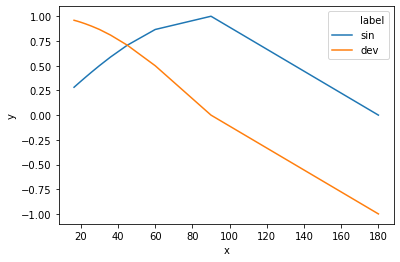

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sin_values = [f(np.pi/float(x)) for x in range(1,12)]
derivate_values = [derive(f,np.pi/float(x)) for x in range(1,12)]
pis = [math.degrees(np.pi/float(x)) for x in range(1,12)]
pis = pis + pis
labels_sin = ['sin' for x in range(1,12)]
labels_derivate = ['dev' for x in range(1,12)]



d = {'y':sin_values + derivate_values,'x':pis, 'label': labels_sin + labels_derivate}
data = pd.DataFrame(d)
sns.lineplot(data=data, x='x', y='y', hue='label')